
# Project: Investigate Appointmens of patients in Barazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 
A number of characteristics about the patient are included in each row.
>
>‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

**Questions** that can be answered by this data are 
>Which feature has more impact on the showing up of patient
>
>Another question is if Neighborhood has any impact on the Showing up of patient
>
>Age and gender feature can be explored if they are impacting any influence on the patients appointment showing up

In [1]:
#Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Purpose**: In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# Load the dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
# To get an idea of rows and columns of the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


From this data, it seems like that 0 stands for the absence of the illness and 1 stands for the presence of the disease. Moreover first two columns are extra and can be dropped. They will be taken care of later.
In the last column "NO-Show", No means that the patient visited the hospital.And yes stands for the absence of the patient.

In [4]:
#To know the number of rows and columns
df.shape # 

(110527, 14)

In [5]:
# To know the total number of duplicate values( if any)
sum(df.duplicated())

0

Its good to know that there are no duplicate rows

In [6]:
# To know the number of features having missing values and the data types of the coulmns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# Verify the change of the columns to date tiem format
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
# A function, replace_1, is described to replace the columns of Gender and NoShow Appointment with the 0 and 1 for the ease of analysis
def replace_1(x,y,a,b,df,col):
    df[col].replace((x, y), (a, b), inplace=True)
    return df

In [9]:
# the function is called to apply on the Gender column
df = replace_1('F','M',0,1,df,'Gender')

In [10]:
# the function is called on the No-show column
df = replace_1('Yes','No',0,1,df,'No-show')


### Data Cleaning 

Seems like Appointment day and Scheduled day should be in 'datetime' format.
There are no missing values in any column.

In [11]:
# to change the format of the columns to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [12]:
# Verify the change of the columns to date tiem format
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                     int64
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                    int64
dtype: object

In [13]:
# drop the columns which have no considerable value in Analysis
df.drop(columns =['PatientId','AppointmentID'] ,inplace = True)

In [14]:
#Verify if the columns have been dropped
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

Great! now lets have a view on the minimum age column , that is shown -1

In [15]:
# Handling the Age column
df['Age'].min()

-1

In [16]:
minimum = df['Age'].min()
df.loc[df.Age == minimum]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,0,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,1


In [17]:
# dropping the row with -1 Age
df.drop(df.loc[df.Age == minimum].index, inplace =True)

In [18]:
# verifying the result
df['Age'].min()

0

In [19]:
# seeing the number of unique values of Age
df['Age'].nunique()

103

This shows an impressive age range of the Barazilian society. They have good long ages.

<a id='eda'></a>
## Exploratory Data Analysis


In [20]:
# to display the useful descriptive statistics for each column of data
df.describe()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,0.350026,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,0.476980,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


First two columns will not play any good role in the Analysis , so will be dropped down.
>Age column has minimum '-1' age, which is not possible and shoulb be taken care of.Maximum age is 115 years, which can be possible.37 years is the mean age.

>Scholorship column has mean of 0.09 which shows that only 9% of the patient in the data have been enrolled for medical scholorship program of Brazil.

> 39% of patients have Hypertension, 25% have diabetes, 17% have Alcholism issue, 16% were Handicapped.

> Total 46% Patients receive the sms

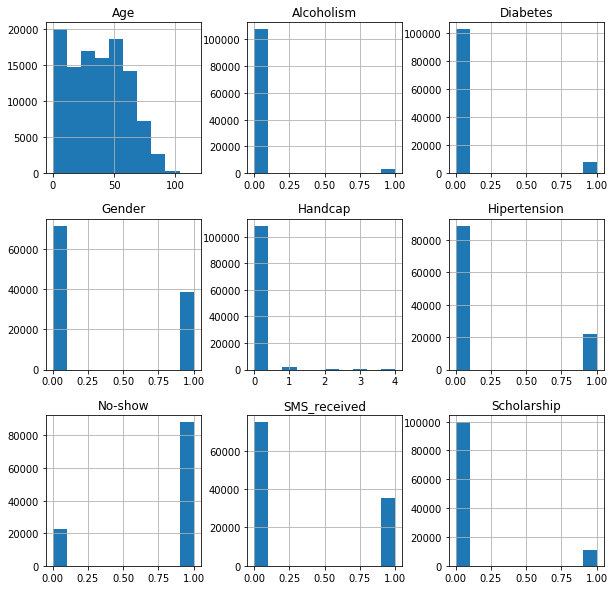

In [21]:
#to have a general distribution view of numeric columns 
df.hist(figsize = (10,10));

### Research Question 1 
>Which feature has more impact on the showing up of patient

In [22]:
# to find the correlation of the different features With No show Column
df.corr()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
Gender,1.000000,-0.106452,-0.114296,-0.055722,-0.032556,0.106166,0.022813,-0.046302,0.004122
Age,-0.106452,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,0.060327
Scholarship,-0.114296,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,-0.029134
Hipertension,-0.055722,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,0.035704
Diabetes,-0.032556,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,0.015181
Alcoholism,0.106166,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.000197
Handcap,0.022813,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.006077
SMS_received,-0.046302,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,-0.126428
No-show,0.004122,0.060327,-0.029134,0.035704,0.015181,0.000197,0.006077,-0.126428,1.000000


In [23]:
#grouping the data by the number of patients that appear and those that don't
df.groupby('No-show').mean()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
No-show,,,,,,,,
0,0.346118,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371
1,0.351015,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337


so the message receiving has negative impact. 43% will not show up as compared to 29% who have received and will come to their appoinment

In [24]:
# I want to drop the age column as it is amsking the effects of other all features in plot
no_age_column = df.drop(columns =['Age'] )

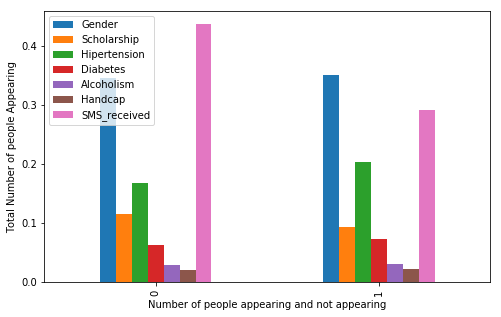

In [25]:
no_age_column.groupby('No-show').mean().plot(kind = 'bar',figsize = (8,5))
plt.xlabel('Number of people appearing and not appearing')
plt.ylabel('Total Number of people Appearing')
plt.legend(loc='upper left');

### If a patient is receiving message and is also eligible for scholorship?
What are the chances that he will show up

In [26]:
# to see the proportion of people having scholorship and received message, appear or not
show = no_age_column.groupby(['SMS_received','Scholarship'])

show.mean()

Gender  Hipertension  Diabetes  Alcoholism  \
SMS_received Scholarship                                                 
0            0            0.383332      0.201232  0.076749    0.031172   
             1            0.198477      0.178086  0.053290    0.054785   
1            0            0.335616      0.196892  0.068143    0.022579   
             1            0.156348      0.163766  0.050499    0.035663   

                           Handcap   No-show  
SMS_received Scholarship                      
0            0            0.025425  0.835407  
             1            0.020392  0.810495  
1            0            0.016950  0.731057  
             1            0.013124  0.662197

Interesting!
If apatient has a scolorship and do receive a sms, 66% chances are that it will not appear.
However, if patient has neither enroled in Scholorship program and nor receive smsm, 84% chances are that they will appear

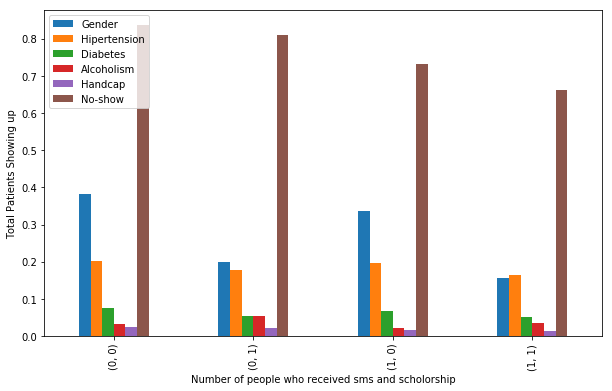

In [27]:
#Visualizing the results of combination of message and sms received 
show.mean().plot(kind = 'bar',figsize=(10,6));
plt.ylabel('Total Patients Showing up');
plt.xlabel('Number of people who received sms and scholorship')
plt.legend(loc='upper left');

### Research Question 2  
>if Neighborhood has any impact on the Showing up of patient

In [28]:
# grouping the data with respect to location/Neighborhood with special relation with Shoe up column of patient
location = df.groupby('Neighbourhood')['No-show'].mean()

In [29]:
location.sort_values(axis = 0, ascending = False)

Neighbourhood
PARQUE INDUSTRIAL              1.000000
ILHA DO BOI                    0.914286
AEROPORTO                      0.875000
MÁRIO CYPRESTE                 0.854447
SOLON BORGES                   0.852878
DE LOURDES                     0.845902
DO CABRAL                      0.842857
SANTA MARTHA                   0.841584
JARDIM DA PENHA                0.837245
DO QUADRO                      0.835100
VILA RUBIM                     0.834313
MORADA DE CAMBURI              0.833333
MATA DA PRAIA                  0.829193
REPÚBLICA                      0.828743
CONSOLAÇÃO                     0.827762
PONTAL DE CAMBURI              0.826087
SANTO ANTÔNIO                  0.823744
REDENÇÃO                       0.822923
NOVA PALESTINA                 0.822438
JABOUR                         0.820247
SANTA LUÍZA                    0.820093
COMDUSA                        0.819355
JOANA D´ARC                    0.819201
TABUAZEIRO                     0.817050
FORTE SÃO JOÃO            

This Shows that if a patient belongs to following three places, chances that he will show up is more than 87%
>PARQUE INDUSTRIAL              
ILHA DO BOI                   
AEROPORTO                     
>
However, following three places have least shown up percentages
>SANTA CECÍLIA                 
SANTOS DUMONT                  
ILHAS OCEÂNICAS DE TRINDADE    

### Research Question 3
>Age and gender feature can be explored if they are impacting any influence on the patients appointment showing up

In [30]:
# First I will divide the age column into few groups for better understanding
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0,2, 12, 19, 35,50, 80,115] 
# Labels for the level groups
bin_names = ['newborn','kids','Teenagers','mature', 'adult', 'sober','older'] 
# Creates age_levels column
df['age_levels'] = pd.cut(df['Age'], bin_edges, labels=bin_names)


In [31]:
# Grouping the data bu Age and Gender
df.groupby(['Gender','age_levels'])['No-show'].mean()

Gender  age_levels
0       newborn       0.830352
        kids          0.780359
        Teenagers     0.745665
        mature        0.761290
        adult         0.794482
        sober         0.836300
        older         0.836185
1       newborn       0.826979
        kids          0.778601
        Teenagers     0.730723
        mature        0.766858
        adult         0.801783
        sober         0.843339
        older         0.834236
Name: No-show, dtype: float64

Text(0.5,0,'Gender and Age groups')

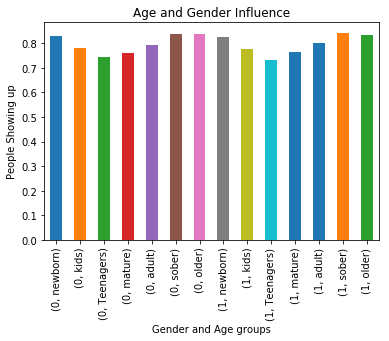

In [32]:
#Viewing the impact it can have
plotly = df.groupby(['Gender','age_levels'])['No-show'].mean().plot(kind ='bar',title = 'Age and Gender Influence');
plotly.set_ylabel('People Showing up')
plotly.set_xlabel('Gender and Age groups')

<a id='conclusions'></a>
## Conclusions

> **Result**: So It has been explored and i am confident to conclude that scholorship and Sms receivers are less likely to show up than those who have not sms service and Have no Scholorship program

> **Age and Gender Impact** It can be concluded as well that Age and Gender has no significant influence on the showing up of the patients
>
> **Location** yes! Location does impact the patient showing up at the appointment. PARQUE INDUSTRIAL, ILHA DO BOI, AEROPORTO patients are likely and have high chances to appear than SANTA CECÍLIA, SANTOS DUMONT, ILHAS OCEÂNICAS DE TRINDADE

>>**Limitations**
>> Data is quite limited to make any Analysis.
Only a limited time is chosen which is insufficient to make any conclusive decisive Analysis.
>> More columns for the diseases can be included for better Analysis.